In [1]:
import pandas as pan
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from gptomics import plot

In [2]:
ad = pan.read_csv(filepath_or_buffer="./application_domains")

at = pan.read_csv(filepath_or_buffer="./application_transactions")

pd = pan.read_csv(filepath_or_buffer="./production_domains")

pt = pan.read_csv(filepath_or_buffer="./production_transactions")

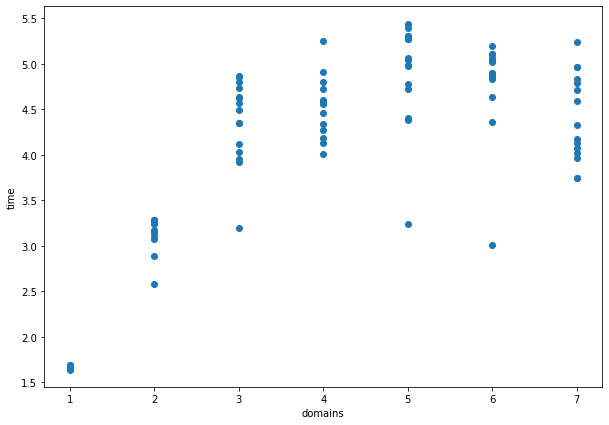

In [3]:
plt.figure(figsize=(10,7))
plt.xlabel("domains")
plt.ylabel("time")
plt.scatter(ad["domains"],ad["time"])

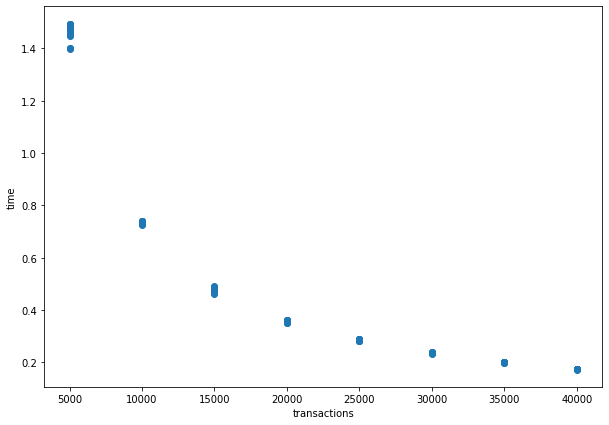

In [4]:
plt.figure(figsize=(10,7))
plt.xlabel("transactions")
plt.ylabel("time")
plt.scatter(at["transactions"],at["time"])

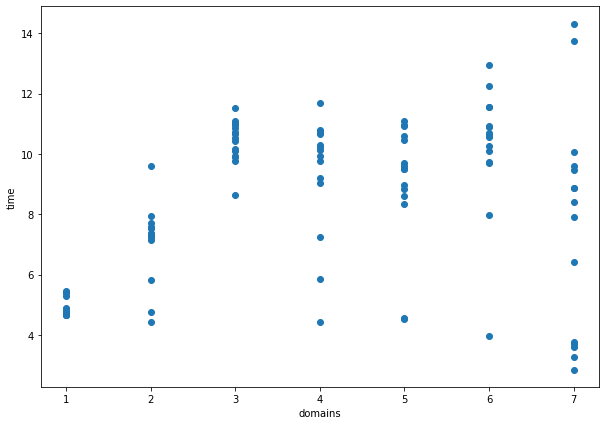

In [5]:
plt.figure(figsize=(10,7))
plt.xlabel("domains")
plt.ylabel("time")
plt.scatter(pd["domains"],pd["time"])

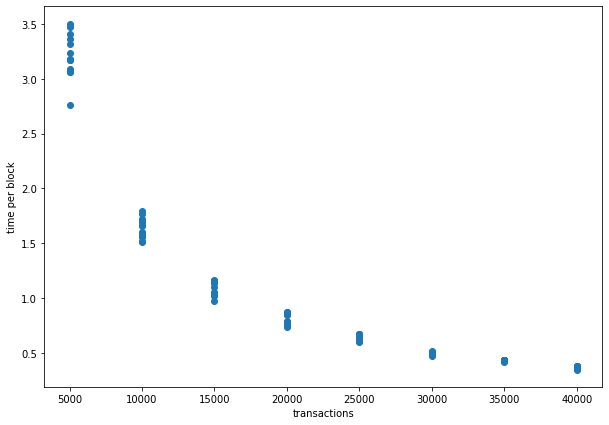

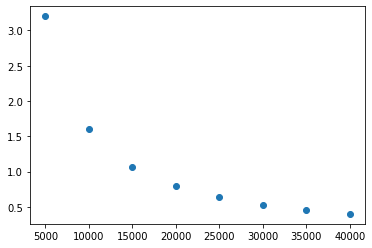

In [6]:
plt.figure(figsize=(10,7))
plt.xlabel("transactions")
plt.ylabel("time per block")
plt.scatter(pt["transactions"],pt["time"])
ptp = 1/pt
fig = plt.figure()
transactions = np.arange(5000,45000,5000)
times = transactions * (2.5/40000)
plt.scatter(transactions, 1/times)

In [7]:
# const = 3.4/25510
const = (3.4)/(25510*(1.05))
change = 1.05
n = 1.5
a = 0
b = 1
h = 0
def f(t, d):
  return (const * (t) + a) / ((d**n) + b) + h
  
t = np.linspace(5000,40000,30)
d = np.linspace(1,7,30)

t, d = np.meshgrid(t,d)
z = f(t,d)

[7 7 7 7 7 7 7 7 6 6 6 6 6 6 6 6 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 3 3 3 3 3
 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1]


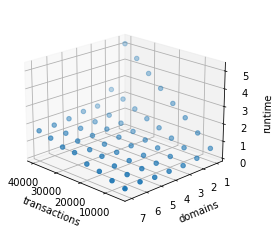

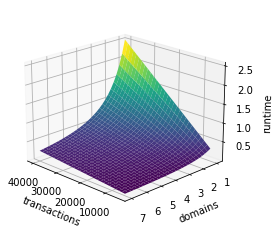

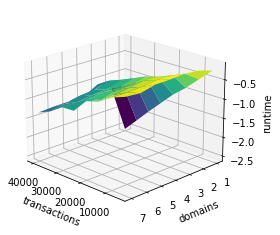

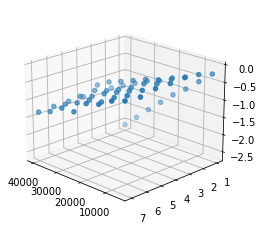

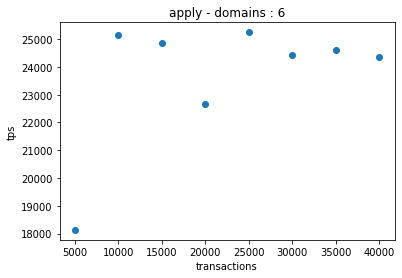

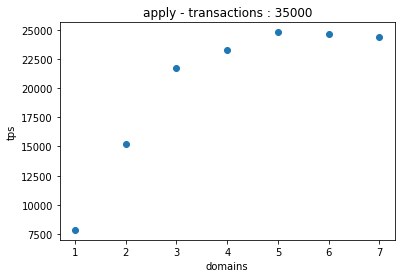

In [8]:
viewx, viewy = (20, 135)
# Data from application over the transaction domain parameter space 
atd = pan.read_csv(filepath_or_buffer="./application_transactions_domains")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(atd["transactions"],atd["domains"],atd["time"])
ax.view_init(viewx, viewy)
ax.set_xlabel('transactions')
ax.set_ylabel('domains')
ax.set_zlabel('runtime');

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(t, d, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(viewx, viewy)
ax.set_xlabel('transactions')
ax.set_ylabel('domains')
ax.set_zlabel('runtime');

fig = plt.figure()
ax = plt.axes(projection='3d')
transactions, domains, times =np.array(atd["transactions"]), np.array(atd["domains"]), np.array(atd["time"])
error = f(transactions,domains) - times
transactionsr = np.reshape(transactions, (7,8))
domainsr = np.reshape(domains, (7,8))
timesr = np.reshape(times, (7,8))
errorr = np.reshape(error, (7,8))
ax.plot_surface(transactionsr, domainsr, errorr, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.view_init(viewx, viewy)
ax.set_xlabel('transactions')
ax.set_ylabel('domains')
ax.set_zlabel('runtime');

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(transactions,domains,error)
ax.view_init(viewx, viewy)

# transactions on a set domain
plt.figure()
ax = plt.axes()
ax.set_xlabel('transactions')
ax.set_ylabel('tps')
transactions, domains, times = np.array(atd["transactions"]), np.array(atd["domains"]), np.array(atd["time"])
transactionsr = np.reshape(transactions, (7,8))
timesr = np.reshape(times, (7,8))
domainsr = np.reshape(domains, (7,8))
d = 1
plt.title(f"apply - domains : {7 - d}")
plt.scatter(transactionsr[d,:],transactionsr[d,:]/timesr[d,:])
print(domains)
# view_init(viewx, viewy)

# domains with set transactions
plt.figure()
ax = plt.axes()
ax.set_xlabel('domains')
ax.set_ylabel('tps')
t = 1
plt.title(f"apply - transactions : {transactionsr[0,t]}")
plt.scatter(domainsr[:,t],transactionsr[:,t]/timesr[:,t])

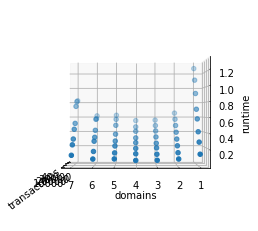

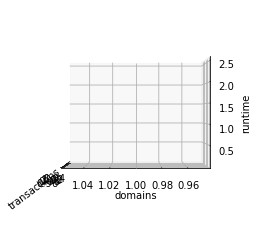

In [9]:

viewx, viewy = (0,180)
# Data from application over the transaction domain parameter space 
atd = pan.read_csv(filepath_or_buffer="./production_transactions_domains")
transactions, domains, times =np.array(atd["transactions"]), np.array(atd["domains"]), np.array(atd["time"])
error = f(transactions,domains) - times
transactionsr = np.reshape(transactions, (7,8,10)).mean(axis=2)
domainsr = np.reshape(domains, (7,8,10)).mean(axis=2)
timesr = np.reshape(times, (7,8,10)).mean(axis=2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(transactionsr, domainsr, timesr)
ax.view_init(viewx, viewy)
ax.set_xlabel('transactions')
ax.set_ylabel('domains')
ax.set_zlabel('runtime');

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(t, d, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(viewx, viewy)
ax.set_xlabel('transactions')
ax.set_ylabel('domains')
ax.set_zlabel('runtime');

ValueError: cannot reshape array of size 560 into shape (7,8)

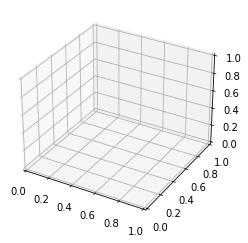

In [10]:

fig = plt.figure()
ax = plt.axes(projection='3d')
transactions, domains, times =np.array(atd["transactions"]), np.array(atd["domains"]), np.array(atd["time"])
error = f(transactions,domains) - times
transactionsr = np.reshape(transactions, (7,8))
domainsr = np.reshape(domains, (7,8))
timesr = np.reshape(times, (7,8))
errorr = np.reshape(error, (7,8))
ax.plot_surface(transactionsr, domainsr, errorr, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.view_init(viewx, viewy)
ax.set_xlabel('transactions')
ax.set_ylabel('domains')
ax.set_zlabel('runtime');

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(transactions,domains,error)
ax.view_init(viewx, viewy)

plt.figure()
ax = plt.axes()
ax.set_xlabel('transactions')
ax.set_ylabel('tps')
transactions, domains, times = np.array(atd["transactions"]), np.array(atd["domains"]), np.array(atd["time"])
transactionsr = np.reshape(transactions, (7,8))
timesr = np.reshape(times, (7,8))
domainsr = np.reshape(domains, (7,8))
d = 1
plt.title(f"produce - domains : {7 - d}")
plt.scatter(transactionsr[d,:],transactionsr[d,:]/timesr[d,:])

plt.figure()
ax = plt.axes()
ax.set_xlabel('domains')
ax.set_ylabel('tps')
t = 1
plt.title(f"produce - transactions : {transactionsr[0,t]}")
plt.scatter(domainsr[:,t],transactionsr[:,t]/timesr[:,t])

In [ ]:

class full_model:
  def __init__(self,a, b, c, h, n, learning_rate):
    self.a = a
    self.b = b
    self.c = c
    self.h = h
    self.n = n
    self.learning_rate = learning_rate

  def ev(self, transactions, domains):
    self.guess = ((self.c * transactions) + self.a) / ((domains ** self.n) + self.b) + self.h

  def backwards(self, transactions, domains, times ):
    a = self.a
    b = self.b
    c = self.c 
    h = self.h
    n = self.n
    t = transactions
    d = domains
    self.ev(transactions, domains)
    self.error = (times - self.guess)
    self.a_grad = (2 * self.error * (1 / (domains ** n + b))).mean()
    self.b_grad = (2 * self.error * -(c*t + a) / (d**(2*n) + 2*(d**n)*b + b**2)).mean()
    self.c_grad = (2 * self.error * (t / (d**n + b))).mean()
    self.h_grad = (2 * self.error).mean()
    self.n_grad = (2 * self.error * (-(c*t + a)*(np.log(d)*(d**n)) / (d**(2*n) + 2*(d**n)*b + b**2))).mean()

  def backprop(self, transactions, domains, times):
    self.backwards(transactions, domains, times)
    a_init = self.a
    self.a -= self.a_grad * self.learning_rate
    print(f"a diff is {a_init - self.a}")
    self.b -= self.b_grad * self.learning_rate
    self.c -= self.c_grad * self.learning_rate
    h_init = self.a
    self.h -= self.h_grad * self.learning_rate
    print(f"h diff is {h_init - self.h}")
    print(f"h grad is {self.h_grad}")
    n_init = self.n_grad 
    self.n -= self.n_grad * self.learning_rate
    print(f"n diff is {self.n_grad * self.learning_rate}")
    
  def learn(self, transactions, domains, times, rounds):
    # halfway = int(len(y_input)/2)
    # self.m = (y_input[halfway] - y_input[0])/ (x_input[halfway] - x_input[0])
    # self.b = y_input[0] - x_input[0] * self.m 
    self.a = 0
    self.n = 0
    for i in range(0, rounds):
      self.backprop(transactions, domains, times)
      self.ev(transactions, domains)


In [ ]:

transactions, domains, times = np.array(atd["transactions"]), np.array(atd["domains"]), np.array(atd["time"])
const = (3.4)/(25510*(1.05))
model = full_model(0,1,const,0,1.5,.01)
# model.learn(transactions, domains, times, 1)
# print(f"a_grad is {model.a_grad}")
# print(f"b_grad is {model.b_grad}")
# print(f"c_grad is {model.c_grad}")
# print(f"h_grad is {model.h_grad}")
# print(f"n_grad is {model.n_grad}")
# print(f"a is {model.a}")
# print(f"b is {model.b}")
# print(f"c is {model.c}")
# print(f"h is {model.h}")
# print(f"n is {model.n}")
model.ev(transactions, domains)
transactionsr = np.reshape(transactions, (8,7))
domainsr = np.reshape(domains, (8,7))
model_timesr = np.reshape(model.guess, (8,7))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(transactionsr, domainsr, model_timesr, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
# ax.scatter(atd["transactions"],atd["domains"],atd["time"])
ax.view_init(20,135)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ValueError: cannot reshape array of size 560 into shape (8,7)